In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

TypeError: Invalid shape (5, 8, 8) for image data

<Figure size 640x480 with 0 Axes>

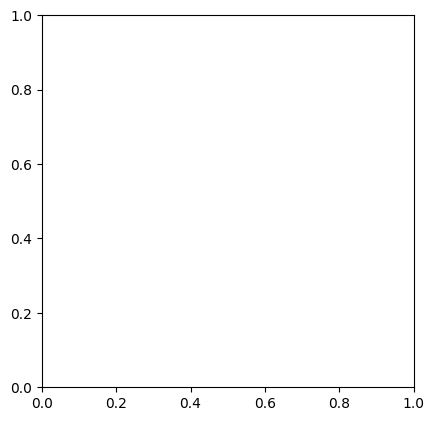

In [26]:
plt.gray()
plt.matshow(digits.images[0])

In [11]:
digits.target[0:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [13]:
digits.target_names[0:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.1)

In [18]:
len(X_train)


1617

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.score(X_test,y_test)

0.9666666666666667

In [24]:
model.predict([digits.data[60]])

array([3])

In [25]:
digits.target[60]

3

In [27]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [30]:
test_result=model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,test_result)
cm

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 21,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 12]])

Text(95.72222222222221, 0.5, 'Predicted')

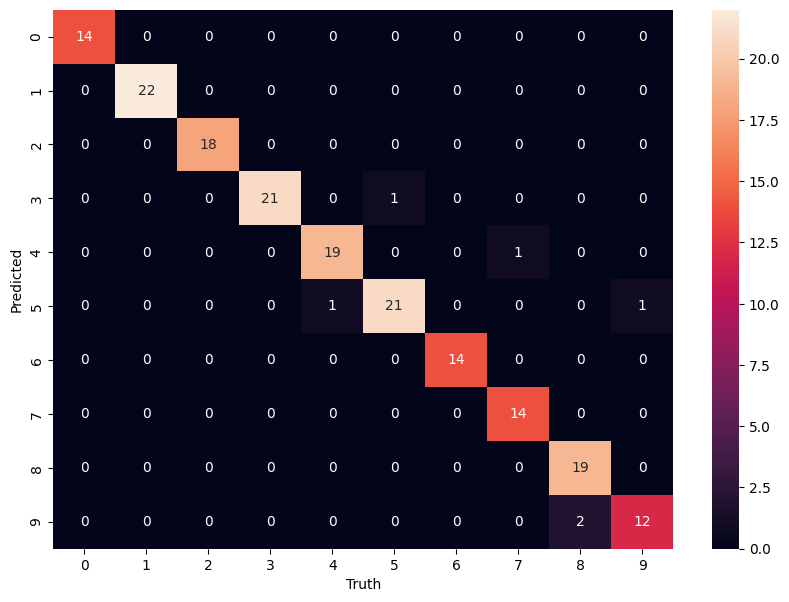

In [32]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel("Predicted")